*This notebook is a part of a series, [Learning image manipulation in Python](#find), that covers the basics of working with images in [OpenCV](https://docs.opencv.org/), [Matplotlib](https://matplotlib.org/users/index.html) and [Numpy](https://numpy.org/doc/).*

# Basic manipulations: Scale, crop, copy and paste


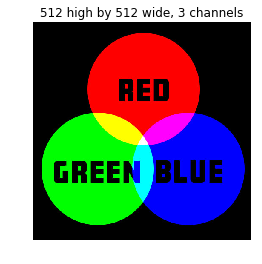

In [52]:
from matplotlib import pyplot as plt
import cv2

# Convenience function for displaying images
def showImage( image, title="" ):
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Load and convert image to RGB in a single line
image = cv2.cvtColor(cv2.imread("images/rgb.jpg"), cv2.COLOR_BGR2RGB)
showImage( image, title='%d high by %d wide, %d channels' % image.shape )

## Scaling an image

You can scale an image in openCV using the [resize()](https://docs.opencv.org/trunk/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d) method. The first argument is the source image, dsize is a tuple containing the width and height.

```python
dst = cv.resize( src, dsize[, dst[, fx[, fy[, interpolation]]]] )
```

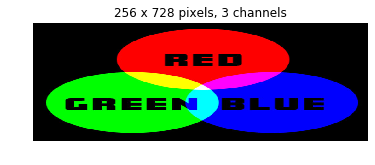

In [47]:
resized_image = cv2.resize(image, (728, 256))

showImage( resized_image, title='%d x %d pixels, %d channels' % resized_image.shape )

## Cropping and image

Because cv2 stores images as numpy arrays you can reference a section of an image by using slice notation on the image. Remember that the column (height) proceeds the row (width).

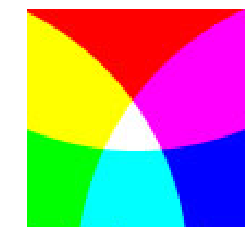

In [53]:
x = 210  # Horizontal position of upper right corner of crop area
y = 225  # Vertical position of upper right corner of crop area
w = 100  # Width of crop area
h = 100  # Height of crop area

slice = image[y:y+h, x:x+w].copy()

showImage(slice)

Remember this is just a reference to the original image however. If you want a new copy use the `copy()` method.

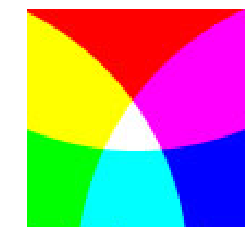

In [54]:
slice = image[y:y+h, x:x+w].copy()

showImage(slice)

## Copying and pasting

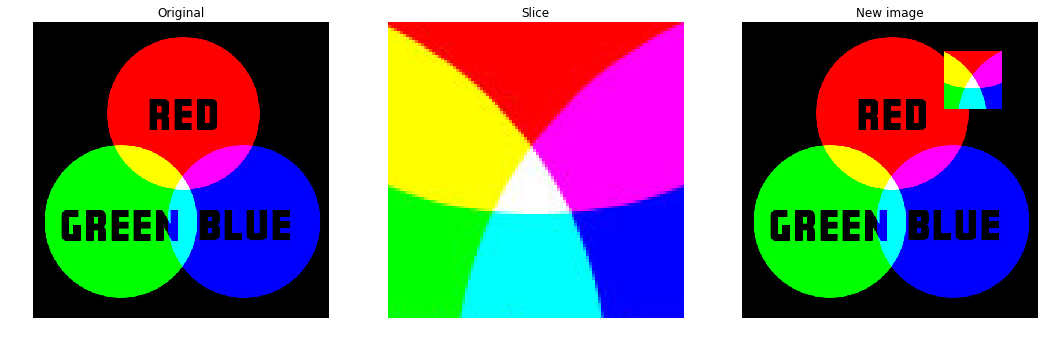

In [50]:
# Upper right corner position of cut area
x1 = 210  # Horizontal position
y1 = 225  # Vertical position

# Upper right corner position of paste area
x2 = 350  # Horizontal position
y2 = 50 # Vertical position

# Dimensions of area to copy
w = 100  # Width
h = 100  # Height

slice = image[y1:y1+h, x1:x1+w].copy()

newImage = image.copy()
newImage[y2:y2+h, x2:x2+w] = slice

f, images = plt.subplots(1, 3, figsize=(18, 16))

images[0].imshow(image)
images[0].title.set_text('Original')
images[0].axis('off')
images[1].imshow(slice)
images[1].title.set_text('Slice')
images[1].axis('off')
images[2].imshow(newImage)
images[2].title.set_text('New image')
images[2].axis('off')
plt.show()